<a href="https://colab.research.google.com/github/Lutris98/Cheatsheets/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
parser=lambda x:datetime.strptime(x,'%m/%d/%Y') #보통 서양식 날짜 표기법(연도만 맨뒤로)
df=pd.read_csv('/content/gdrive/MyDrive/Dataset/manualoa_tsa.csv',parse_dates=['DATE'],date_parser=parser)
df.index=df.DATE
df.drop('DATE',axis=1,inplace=True)
df.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


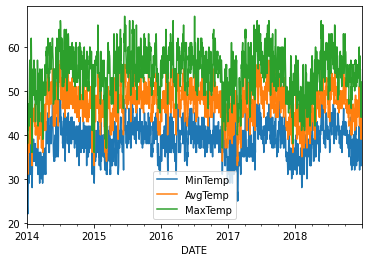

In [38]:
df[['MinTemp','AvgTemp','MaxTemp']].plot().autoscale() #resample/shift/rolling/expanding참고

#MA
Simple은 ewma랑 똑같음 
Linear할 때 add, Exponential할 때 mul

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df.asfreq('D') #필수
df['Simple']=df.AvgTemp.ewm(span=12).mean() #default로 (1-alpha)^i,alpha=2/(span+1) #adjust=False하면 복잡
df['Double']=ExponentialSmoothing(df['AvgTemp'],trend='add').fit().fittedvalues 
df['Triple']=ExponentialSmoothing(df['AvgTemp'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues #판단이 더 어려워서 metric으로 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
 5   Simple   1825 non-null   float64
 6   Double   137 non-null    float64
 7   Triple   0 non-null      float64
dtypes: float64(6), int64(2)
memory usage: 208.3 KB


#I

#AR

#ARMA(p,q) & ARIMA(p,d,q)

#SARIMA(p,d,q)(P,D,Q)m & SARIMAX

#VAR(p) & VARMA(p,q)